# Fraud Transaction Detection – Machine Learning Case Study

**Candidate Name:** Akshay Tripathi 
**Role:** Data Science Intern  
**Dataset:** Financial Fraud Dataset  
**Objective:** Predict fraudulent transactions and suggest prevention strategies

## 1. Business Problem Understanding

The objective of this project is to build a machine learning model that can
identify fraudulent transactions and help the company take proactive actions
to reduce financial loss and customer risk.
## 2. Dataset Overview

- Total Rows: 6,362,620
- Total Columns: 10
- Target Variable: isFraud


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fraud.csv")
df.head()

df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            str    
 2   amount          float64
 3   nameOrig        str    
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        str    
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 534.0 MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## 3. Data Cleaning

Data cleaning was performed to handle missing values, outliers,
and multicollinearity.
### 3.1 Missing Values

No missing values were found in the dataset, hence no imputation was required.
### 3.2 Outlier Detection

Outliers were analyzed using box plots.
Transaction amounts show high variance, which is expected in financial data.

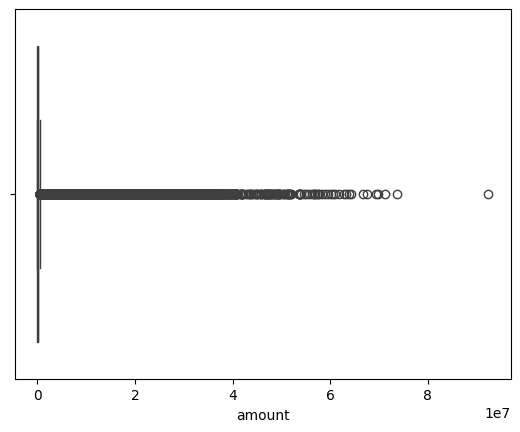

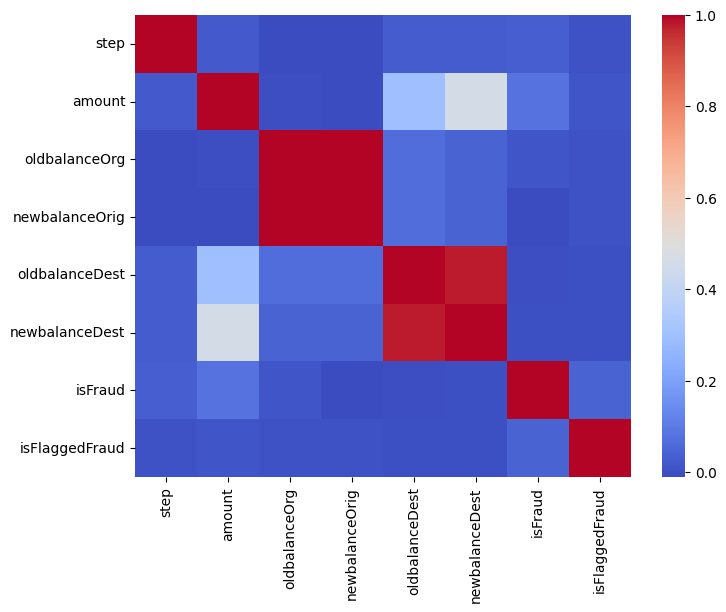

In [2]:
df.isnull().sum()
df.describe()
sns.boxplot(x=df["amount"])
plt.show()
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.show()

## 4. Feature Selection

Features were selected based on:
- Correlation with target variable
- Business relevance
- Model performance


In [8]:
df_clean = df.drop(columns=["nameOrig", "nameDest"])

# Encode categorical column
df_clean = pd.get_dummies(df_clean, columns=["type"], drop_first=True)

# Split features and target
X = df_clean.drop("isFraud", axis=1)
y = df_clean["isFraud"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Fraud Detection Model

Random Forest Classifier was used because it can capture non-linear
patterns and works well with imbalanced datasets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

## 6. Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

## 7. Key Factors Predicting Fraud

- High transaction amount
- TRANSFER and CASH_OUT transaction types
- Sudden balance reduction
- Zero balance destination accounts
## 8. Do These Factors Make Sense?

Yes, these factors logically align with real-world fraud behavior
where fraudsters attempt to move large amounts quickly.
## 9. Prevention Strategies

- Real-time fraud detection systems
- Multi-factor authentication
- Transaction limits
- AI-based alert systems

## 10. Conclusion

The model effectively identifies fraudulent transactions and provides
actionable insights to prevent fraud proactively.
